In [1]:
import pandas as pd    
import random                 
import statsmodels.api as sm           # Proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
from matplotlib import pyplot as plt       # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales

In [2]:
#Se cargan los datos necesarios
tasas_hombres_lan = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/tasas_hombres_lan.xlsx")
tasas_hombres_las = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/tasas_hombres__las.xlsx")
tasas_mujeres_lan = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/tasas_mujeres_lan.xlsx")
tasas_mujeres_las = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/tasas_mujeres_las.xlsx")
pib_all = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/pib_all.xlsx")
pib_lan = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/pib_lan.xlsx")
pib_las = pd.read_excel("C:/Users/Andres/Desktop/Carlos/I Semestre 2023/Herramientas de datos/Investigación/pib_las.xlsx")


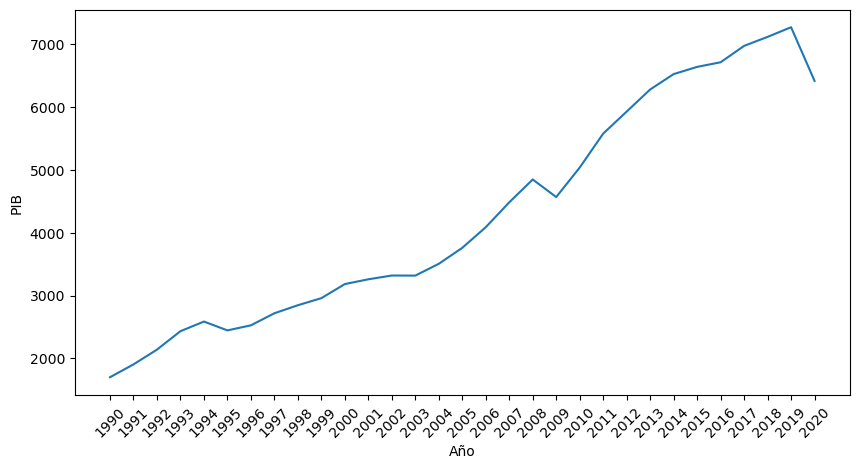

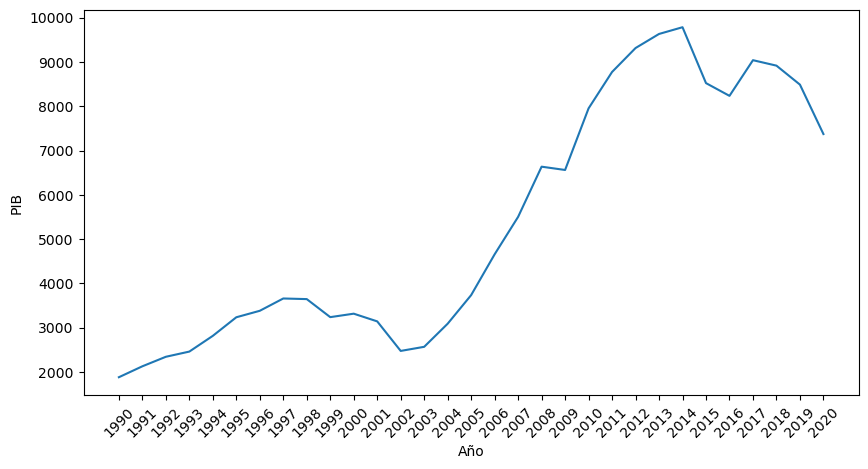

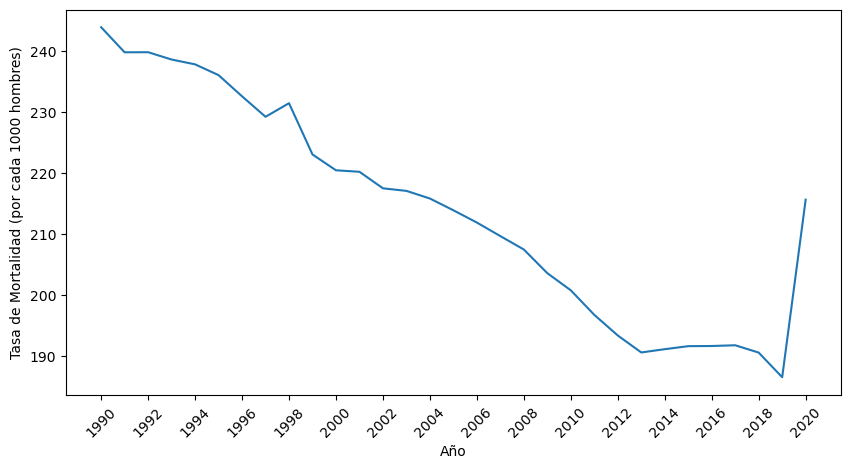

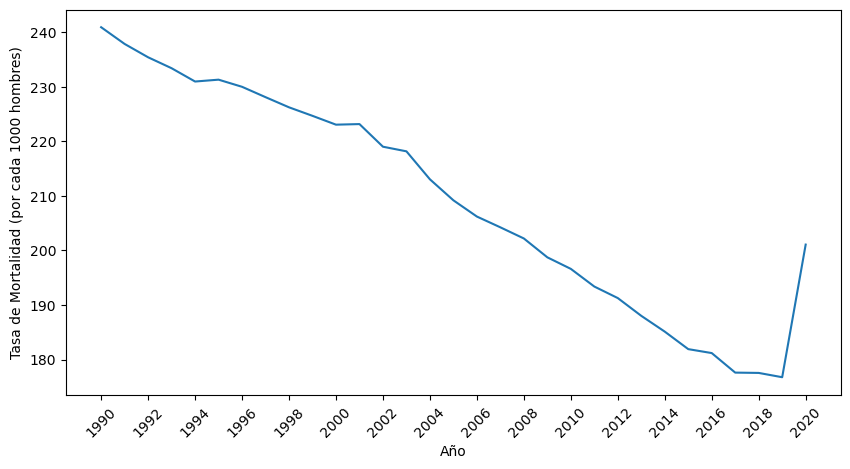

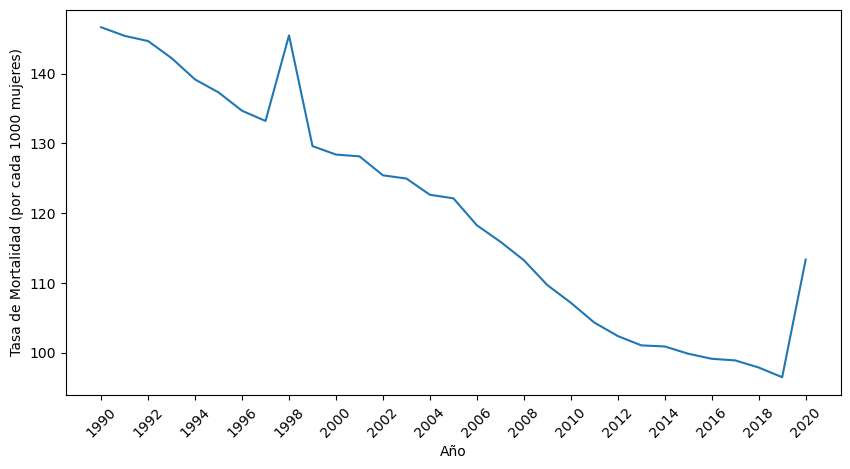

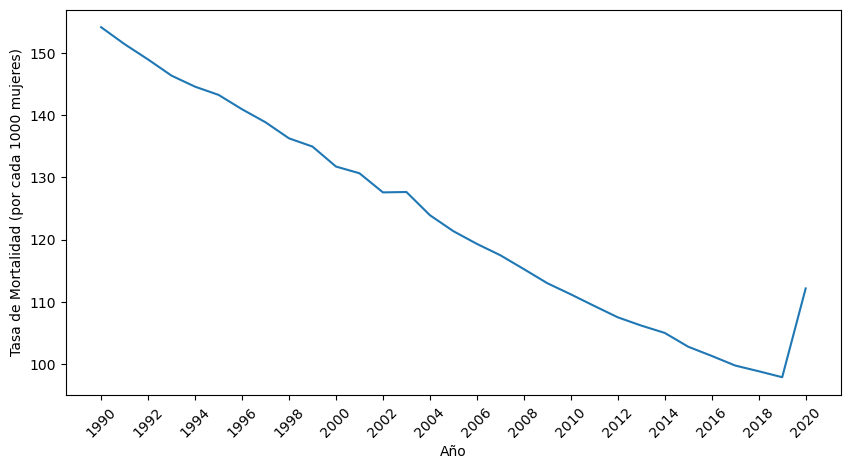

In [4]:
#PIB LAN
years = [str(year) for year in range(1990, 2021)]

# Calcula el promedio del PIB por año
average_pib = pib_lan[years].mean()

# Crea una nueva tabla con el promedio del PIB por año
tabla_pib = pd.DataFrame({'Year': years, 'Average PIB': average_pib})

# Crea un gráfico de líneas con el promedio del PIB por año
plt.figure(figsize=(10, 5))
plt.plot(tabla_pib['Year'], tabla_pib['Average PIB'])
plt.xlabel('Año')
plt.ylabel('PIB')
plt.xticks(rotation=45)
plt.show()

#PIB LAS
years = [str(year) for year in range(1990, 2021)]

# Calcula el promedio del PIB por año
average_pibs = pib_las[years].mean()

# Crea una nueva tabla con el promedio del PIB por año
tabla_pibs = pd.DataFrame({'Year': years, 'Average PIB': average_pibs})

# Crea un gráfico de líneas con el promedio del PIB por año
plt.figure(figsize=(10, 5))
plt.plot(tabla_pibs['Year'], tabla_pibs['Average PIB'])
plt.xlabel('Año')
plt.ylabel('PIB')
plt.xticks(rotation=45)
plt.show()

#TASAS DE MORTALIDAD(la "h" al final significa hombres, si no tiene h al final significa que es para mujeres)

tablas = [tasas_hombres_lan, tasas_hombres_las]

# Selecciona las columnas con los años
years = [str(year) for year in range(1990, 2021)]

# Itera sobre las tablas
for tabla in tablas:
    # Calcula el promedio de las tasas de mortalidad por año
    average_tasa = tabla[years].mean()

    # Crea una nueva tabla con el promedio de las tasas de mortalidad por año
    new_table = pd.DataFrame({'Year': years, 'Average Mortality Rate': average_tasa})
    new_table['Year'] = new_table['Year'].astype(int)
    # Crea un gráfico de líneas con el promedio de las tasas de mortalidad por año
    plt.figure(figsize=(10, 5))
    plt.plot(new_table['Year'], new_table['Average Mortality Rate'])
    plt.xlabel('Año')
    plt.ylabel('Tasa de Mortalidad (por cada 1000 hombres)')
    plt.xticks(ticks=range(1990, 2021, 2), rotation=45)
    plt.show()


#TASAS MUJERES
tablas = [tasas_mujeres_lan, tasas_mujeres_las]

# Selecciona las columnas con los años
years = [str(year) for year in range(1990, 2021)]

# Itera sobre las tablas
for tabla in tablas:
    # Calcula el promedio de las tasas de mortalidad por año
    average_tasa = tabla[years].mean()

    # Crea una nueva tabla con el promedio de las tasas de mortalidad por año
    new_table = pd.DataFrame({'Year': years, 'Average Mortality Rate': average_tasa})
    new_table['Year'] = new_table['Year'].astype(int)
    # Crea un gráfico de líneas con el promedio de las tasas de mortalidad por año
    plt.figure(figsize=(10, 5))
    plt.plot(new_table['Year'], new_table['Average Mortality Rate'])
    plt.xlabel('Año')
    plt.ylabel('Tasa de Mortalidad (por cada 1000 mujeres)')
    plt.xticks(ticks=range(1990, 2021, 2), rotation=45)
    plt.show()

In [27]:
average_pib.info()


<class 'pandas.core.series.Series'>
Index: 31 entries, 1990 to 2020
Series name: None
Non-Null Count  Dtype  
--------------  -----  
31 non-null     float64
dtypes: float64(1)
memory usage: 1.5+ KB


In [36]:
def regresionLineal(dt_mortalidad, dt_PIB):
    datos = pd.DataFrame({'Mortalidad': dt_mortalidad, 'PIB': dt_PIB})
    y = datos['Mortalidad']
    x = datos['PIB']
    mod = smf.ols('y ~ x', data=datos).fit()
    return mod

In [37]:
mod_hombres_lan = regresionLineal(average_tasa,average_pib)

In [42]:
print(mod_hombres_lan.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     429.4
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           6.27e-19
Time:                        09:45:42   Log-Likelihood:                -89.213
No. Observations:                  31   AIC:                             182.4
Df Residuals:                      29   BIC:                             185.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    163.6591      2.109     77.611      0.0

In [43]:
mod_hombres_lan.params

Intercept    163.659130
x             -0.009419
dtype: float64